In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_csv('Dataset/diabetes.csv')

In [3]:
#Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
#Check the dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (768, 9)


In [5]:
#Overview of the dataset
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
#A look at basic statistics
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.

In [7]:
#Check for missing values in specific columns
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_check:
    missing = (df[col] == 0).sum()
    print(f"Number of zero values in {col}: {missing}")

Number of zero values in Glucose: 5
Number of zero values in BloodPressure: 35
Number of zero values in SkinThickness: 227
Number of zero values in Insulin: 374
Number of zero values in BMI: 11


In [8]:
#Replace zero values with NaN
df[columns_to_check] = df[columns_to_check].replace(0, np.nan)

In [9]:
#Fill missing values with the median
df.fillna(df.median(), inplace=True)

In [10]:
#Check for remaining missing values
print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


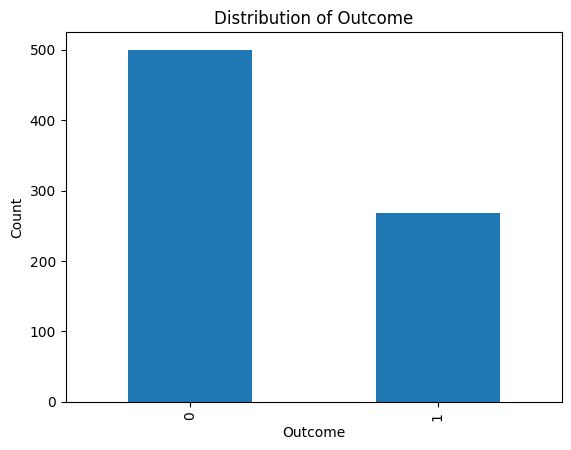

In [11]:
#Distribution of Outcome variable
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

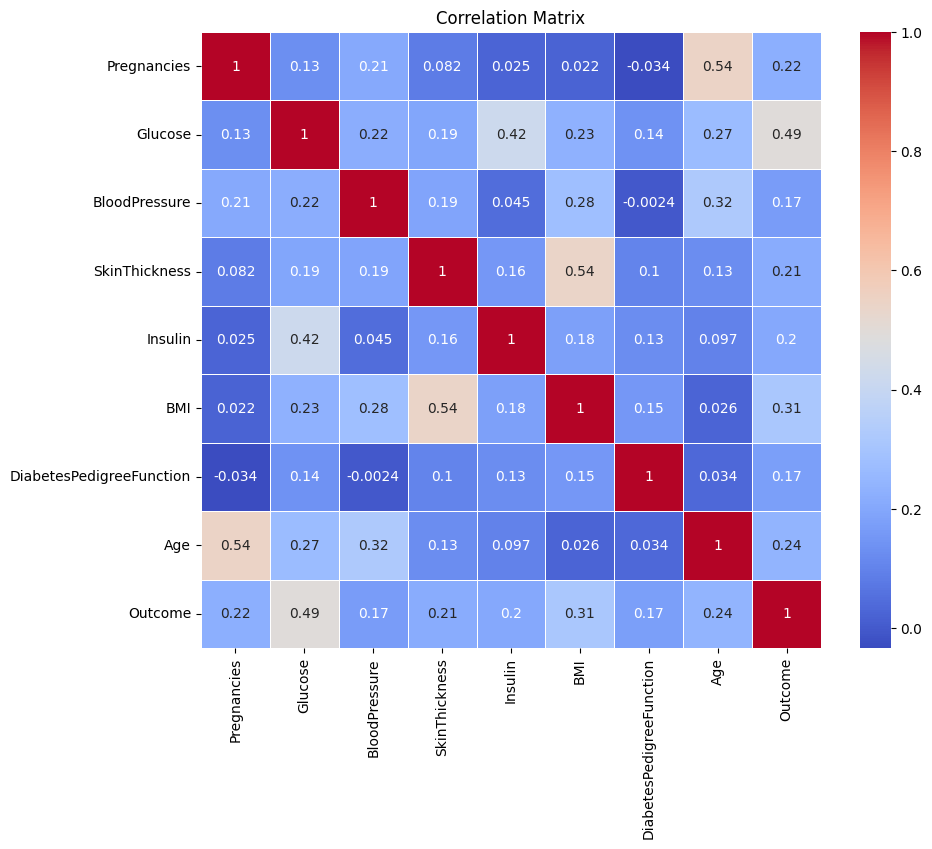

In [12]:
#Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
#Split data into features (X) and target (y)
X = df.drop(columns='Outcome')  #All columns except 'Outcome'
y = df['Outcome']  #Target variable

In [14]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("Data preparation complete!")

Data preparation complete!


In [16]:
#Save the processed dataframe to docs
df.to_csv('dataset/diabetes_processed.csv', index=False)